## Actividad 2
Instrucciones
Por favor, consulta la descripción de los datasets adjuntos en el archivo DescripcionDatos.pdf y realiza lo siguiente:

Elige un dataset.  Elige una variable dependiente y una independiente y realiza lo siguiente (en Python, sin usar librerías de statsmodels):

- Diagrama de dispersión (Interpreta)
-  Coeficiente de correlación (Interpreta)
- Coeficiente de determinación (Interpreta)
- Modelo de regresión lineal (Interpreta los coeficientes)
- Error cuadrático medio (no se requiere interpretación).
- Tabla Anova (no se requiere interpretación)\
Exporta tu notebook de Python como PDF y súbelo, las interpretaciones (y la tabla ANOVA) las puedes escribir ahí mismo como celdas tipo Markdown. Gracias!

Para este ejercicio se eligió el **dataset Advertising**, que contiene información sobre la inversión en publicidad en tres medios distintos (**TV, Radio y Newspaper**) y las **ventas (Sales)** expresadas en miles de unidades.  

El objetivo es analizar la relación entre la **inversión en TV** y las **ventas**.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv("Advertising.csv")  
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


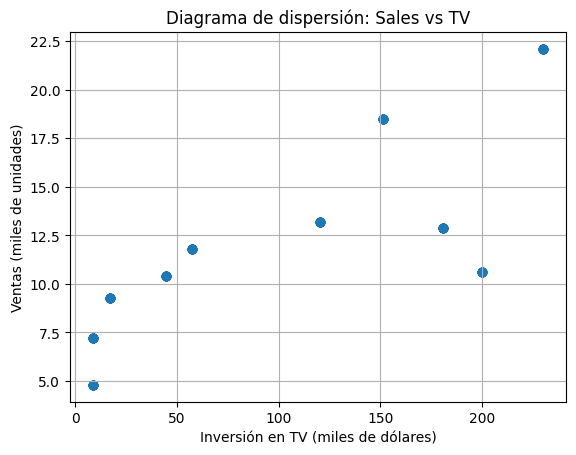

In [3]:
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("Inversión en TV (miles de dólares)")
plt.ylabel("Ventas (miles de unidades)")
plt.title("Diagrama de dispersión: Sales vs TV")
plt.grid(True)
plt.show()

In [4]:
X = df["TV"].values
Y = df["Sales"].values

In [5]:
print("X (TV):", X[:10])
print("Y (Sales):", Y[:10])

X (TV): [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8]
Y (Sales): [22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


In [6]:
# Datos como arreglos
X = np.array(X)
Y = np.array(Y)

# Tamaño de muestra
n = len(X)

# Medias
X_m = np.mean(X)
Y_m = np.mean(Y)

# Coeficiente de correlación de Pearson
r = np.corrcoef(X, Y)[0, 1]

# Coeficientes de la recta (β1, β0)
beta_1 = np.sum((X - X_m)*(Y - Y_m)) / np.sum((X - X_m)**2)
beta_0 = Y_m - beta_1 * X_m

# R-cuadrada
R2 = r**2

# Resultados
print(f"Media de X: {X_m:.2f}")
print(f"Media de Y: {Y_m:.2f}")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Coeficiente de determinación (R²): {R2:.4f}")
print(f"Recta de regresión: ŷ = {beta_0:.2f} + {beta_1:.2f}·X")

Media de X: 101.89
Media de Y: 12.08
Coeficiente de correlación (r): 0.7769
Coeficiente de determinación (R²): 0.6036
Recta de regresión: ŷ = 7.33 + 0.05·X


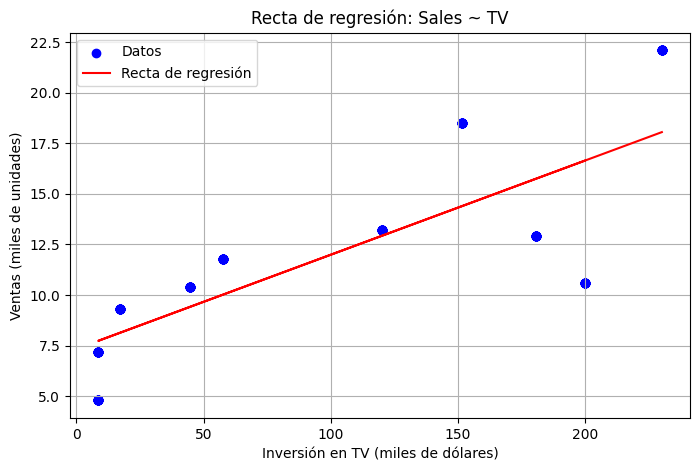

In [7]:
# Valores predichos
Y_pred = beta_0 + beta_1 * X

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Datos', color='blue')
plt.plot(X, Y_pred, color='red', label='Recta de regresión')
plt.xlabel('Inversión en TV (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.title('Recta de regresión: Sales ~ TV')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Error cuadrático medio (MSE)
mse = np.mean((Y - Y_pred)**2)
print(f"Error cuadrático medio (MSE): {mse:.3f}")

Error cuadrático medio (MSE): 9.243


In [9]:
# %%
# Tabla ANOVA (manual)
SST = np.sum((Y - Y_m)**2)          # Total
SSR = np.sum((Y_pred - Y_m)**2)     # Regresión
SSE = np.sum((Y - Y_pred)**2)       # Error

df_reg = 1
df_res = n - 2
df_tot = n - 1

MSR = SSR / df_reg
MSE = SSE / df_res
F = MSR / MSE

print("Tabla ANOVA")
print("Fuente       df        SS        MS        F")
print(f"Regresión    {df_reg:<8}{SSR:>10.2f}{MSR:>10.2f}{F:>10.2f}")
print(f"Residual     {df_res:<8}{SSE:>10.2f}{MSE:>10.2f}")
print(f"Total        {df_tot:<8}{SST:>10.2f}")

Tabla ANOVA
Fuente       df        SS        MS        F
Regresión    1          2814.95   2814.95    301.51
Residual     198        1848.57      9.34
Total        199        4663.52


### Diagrama de dispersión  
El diagrama de dispersión muestra una relación positiva entre la inversión en televisión y las ventas. Se observa que conforme aumenta el gasto en publicidad televisiva, también tienden a incrementarse las ventas, aunque no de manera perfectamente lineal, ya que existen variaciones entre los puntos.


### Coeficiente de correlación  
El coeficiente de correlación obtenido es 0.7769, lo que indica una relación positiva fuerte entre la inversión en televisión y las ventas. Esto significa que, en general, a mayor gasto en TV, se espera un incremento en las ventas, aunque no es una relación perfecta.


### Coeficiente de determinación  
El coeficiente de determinación es 0.6036. Esto implica que aproximadamente el 60 % de la variabilidad en las ventas puede ser explicada por la inversión en televisión. El restante 40 % se debe a otros factores no incluidos en el modelo, como campañas en otros medios, estrategias de marketing, condiciones del mercado u otros elementos externos.


### Modelo de regresión lineal  
El modelo de regresión estimado es:  

ŷ = 7.33 + 0.05X

El intercepto 7.33 representa el nivel promedio de ventas esperado incluso si no hubiera inversión en televisión. La pendiente 0.05 indica que por cada mil dólares adicionales invertidos en TV, las ventas aumentan en promedio 0.05 miles de unidades. Esto refleja un efecto positivo de la publicidad en televisión sobre las ventas.


In [10]:
!pip install scipy

In [11]:
from scipy.stats import t
import numpy as np

Sxx = np.sum((X - X_m)**2)

SE_beta1 = np.sqrt(mse / Sxx)

t_stat = beta_1 / SE_beta1

p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n - 2))

print(f"Estadístico t = {t_stat:.4f}")
print(f"Valor-p = {p_value:.8f}")

Estadístico t = 17.4515
Valor-p = 0.00000000


In [12]:
import statsmodels.api as sm 

X_with_const = sm.add_constant(X)

modelo = sm.OLS(Y, X_with_const).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     301.5
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.19e-41
Time:                        17:15:30   Log-Likelihood:                -506.17
No. Observations:                 200   AIC:                             1016.
Df Residuals:                     198   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3340      0.348     21.050      0.0

Por cada mil unidades invertido en publicidad de TV incrementa las ventas entre 0.041 y 0.052 miles unidades .

Por cada 1,000 unidades gastados, en anuncios de TV, generan entre 41, y 52 unidades, adicionales de ventas.


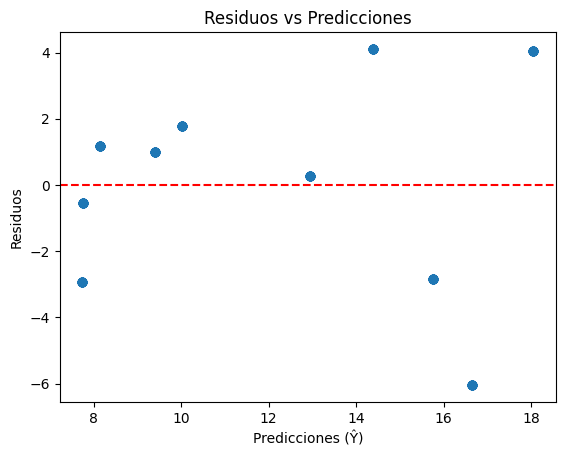

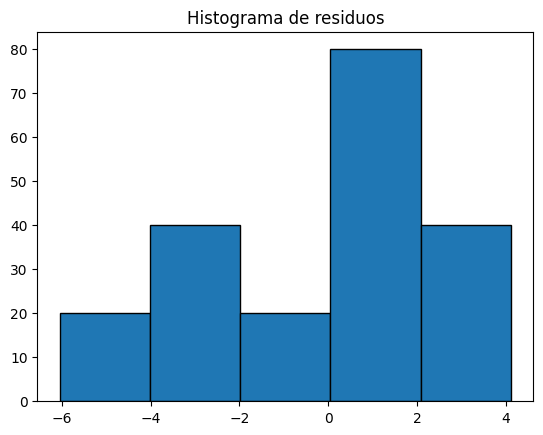

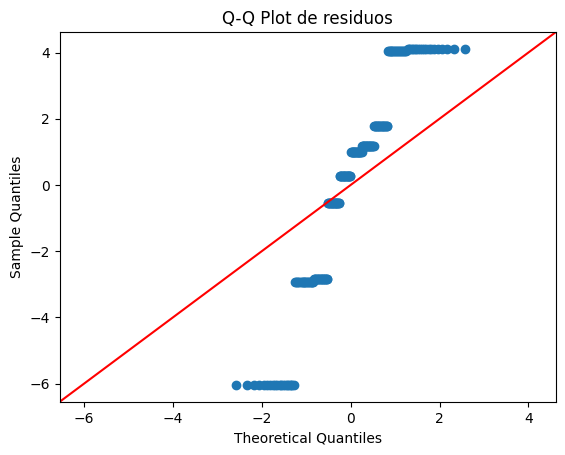

In [15]:
residuos = Y - Y_pred

# --- 1. Residuos vs Predicciones
plt.scatter(Y_pred, residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicciones (Ŷ)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

# --- 2. Histograma de residuos
plt.hist(residuos, bins=5, edgecolor="black")
plt.title("Histograma de residuos")
plt.show()

# --- 3. Q-Q Plot de residuos
sm.qqplot(residuos, line='45')
plt.title("Q-Q Plot de residuos")
plt.show()